Dataset Preview:
                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  
Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    f

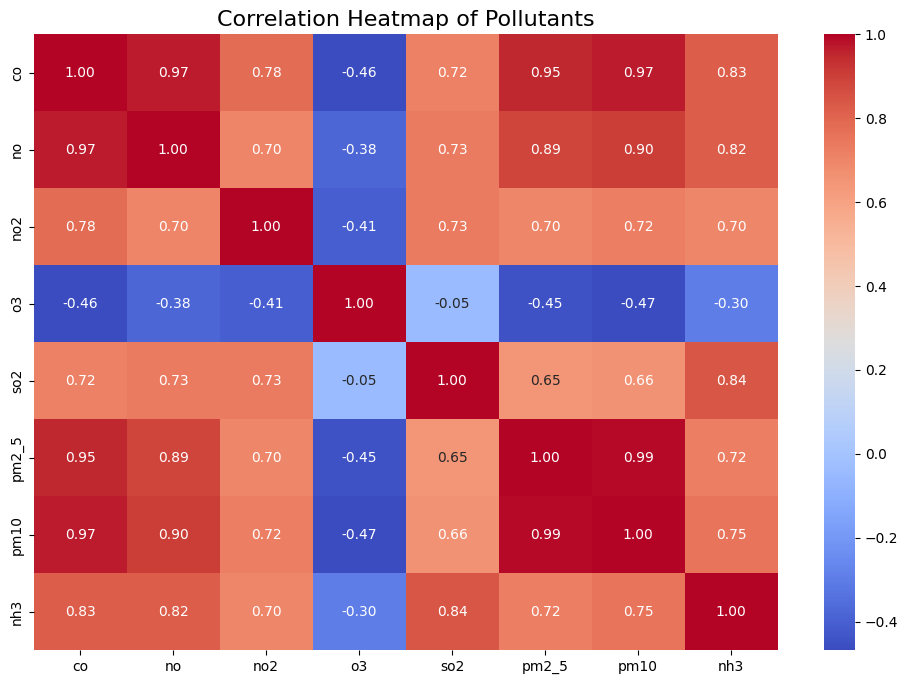

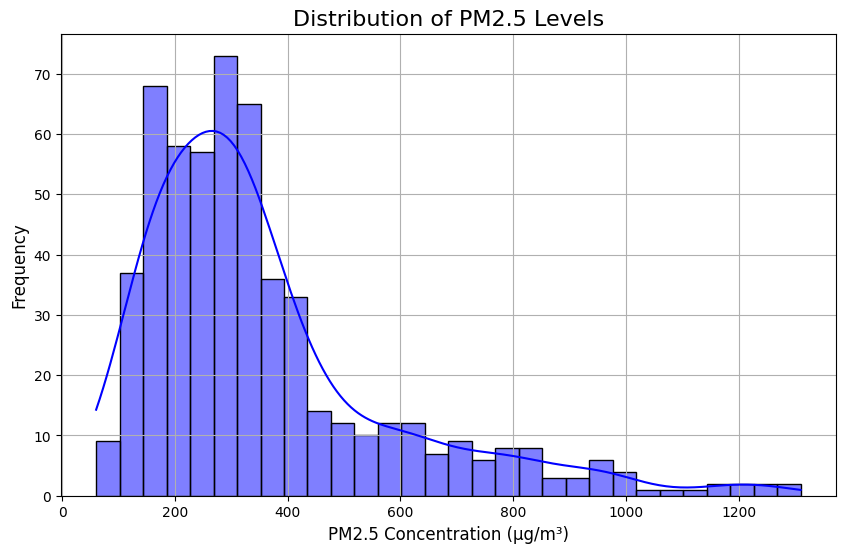

Analysis Complete. Visualizations Generated Successfully!


In [3]:
# Air Quality Index (AQI) Analysis in Delhi
# Submitted by: [Vigyat Bhat]

# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset from device
file_path = "D:/New folder/delhiaqi.csv" 
data = pd.read_csv(file_path)

# here i have previewed the dataset
print("Dataset Preview:")
print(data.head())

# Basic Data Information
print("Data Information:")
print(data.info())

# Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())

# checking for missing values
print("Missing Values:")
print(data.isnull().sum())

# Fill missing values with 0 for simplicity 
data.fillna(0, inplace=True)

# i have analysed the Monthly Trends for PM2.5 and PM10 from the given dataset
if 'month' not in data.columns:
    print("Ensure your dataset contains a 'month' column for seasonal analysis.")
else:
    monthly_avg = data.groupby('month').mean()
    print("Monthly Average Values:")
    print(monthly_avg[['pm2_5', 'pm10']])

    # Visualizing the Seasonal Trends for PM2.5 and PM10 from the data received above
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=monthly_avg[['pm2_5', 'pm10']])
    plt.title('Seasonal Trends in PM2.5 and PM10 Levels', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Concentration (µg/m³)', fontsize=12)
    plt.legend(['PM2.5', 'PM10'])
    plt.grid(True)
    plt.show()

# Compute correlation matrix 
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation = numeric_data.corr()

# Ploting the correlation heatmap using the data obtained
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Pollutants', fontsize=16)
plt.show()

# Distribution of PM2.5 Values
plt.figure(figsize=(10, 6))
sns.histplot(data['pm2_5'], kde=True, bins=30, color='blue')
plt.title('Distribution of PM2.5 Levels', fontsize=16)
plt.xlabel('PM2.5 Concentration (µg/m³)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

# Time Series Visualization
if 'datetime' in data.columns:
    data['datetime'] = pd.to_datetime(data['datetime'])
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='datetime', y='pm2_5', data=data, color='red')
    plt.title('Time Series Analysis of PM2.5 Levels', fontsize=16)
    plt.xlabel('DateTime', fontsize=12)
    plt.ylabel('PM2.5 Concentration (µg/m³)', fontsize=12)
    plt.grid(True)
    plt.show()

print("Analysis Complete. Visualizations Generated Successfully!")
